# Encoding

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('cars.csv')

In [3]:
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000
...,...,...,...,...,...
8123,Hyundai,110000,Petrol,First Owner,320000
8124,Hyundai,119000,Diesel,Fourth & Above Owner,135000
8125,Maruti,120000,Diesel,First Owner,382000
8126,Tata,25000,Diesel,First Owner,290000


In [4]:
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [5]:
df.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64

In [9]:
df[['owner', 'fuel']]

,owner,fuel
0,First Owner,Diesel
1,Second Owner,Diesel
2,Third Owner,Petrol
3,First Owner,Diesel
4,First Owner,Petrol
...,...,...
8123,First Owner,Petrol
8124,Fourth & Above Owner,Diesel
8125,First Owner,Diesel
8126,First Owner,Diesel


In [10]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [11]:
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [12]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['First Owner','Second Owner','Third Owner', 'Fourth & Above Owner', 'Test Drive Car'],['Diesel','Petrol','LPG', 'CNG']])
df[['owner', 'fuel']]= oe.fit_transform(df[['owner', 'fuel']])

In [13]:
oe.categories_

[array(['First Owner', 'Second Owner', 'Third Owner',
        'Fourth & Above Owner', 'Test Drive Car'], dtype=object),
 array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)]

In [14]:
df[['owner', 'fuel']]

,owner,fuel
0,0.0,0.0
1,1.0,0.0
2,2.0,1.0
3,0.0,0.0
4,0.0,1.0
...,...,...
8123,0.0,1.0
8124,3.0,0.0
8125,0.0,0.0
8126,0.0,0.0


In [15]:
df

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,0.0,0.0,450000
1,Skoda,120000,0.0,1.0,370000
2,Honda,140000,1.0,2.0,158000
3,Hyundai,127000,0.0,0.0,225000
4,Maruti,120000,1.0,0.0,130000
...,...,...,...,...,...
8123,Hyundai,110000,1.0,0.0,320000
8124,Hyundai,119000,0.0,3.0,135000
8125,Maruti,120000,0.0,0.0,382000
8126,Tata,25000,0.0,0.0,290000


In [16]:
df['owner'].value_counts()

0.0    5289
1.0    2105
2.0     555
3.0     174
4.0       5
Name: owner, dtype: int64

In [17]:
dummies= pd.get_dummies(df, columns = ['owner'])
dummies

,brand,km_driven,fuel,selling_price,owner_0.0,owner_1.0,owner_2.0,owner_3.0,owner_4.0
0,Maruti,145500,0.0,450000,1,0,0,0,0
1,Skoda,120000,0.0,370000,0,1,0,0,0
2,Honda,140000,1.0,158000,0,0,1,0,0
3,Hyundai,127000,0.0,225000,1,0,0,0,0
4,Maruti,120000,1.0,130000,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,1.0,320000,1,0,0,0,0
8124,Hyundai,119000,0.0,135000,0,0,0,1,0
8125,Maruti,120000,0.0,382000,1,0,0,0,0
8126,Tata,25000,0.0,290000,1,0,0,0,0


# box-cox-transformation

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [20]:
X = df.drop(columns=['brand'])
y = df.iloc[:,-1]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


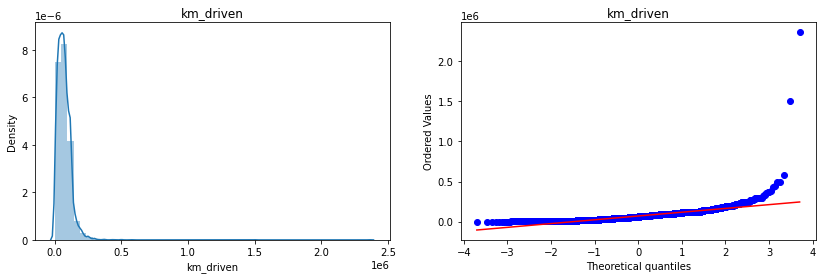

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


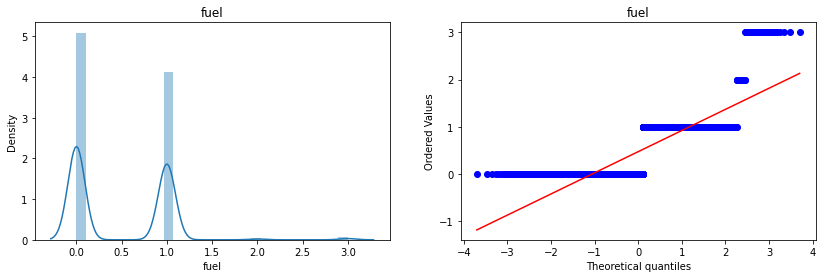

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


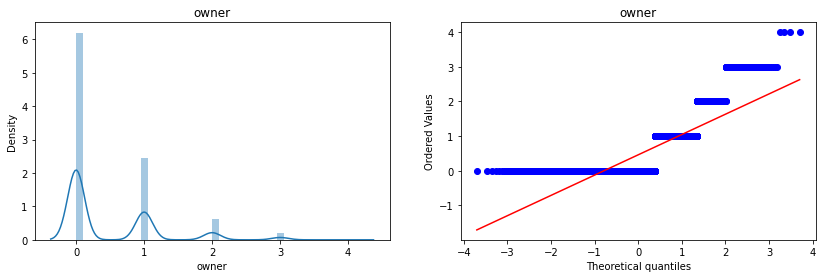

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


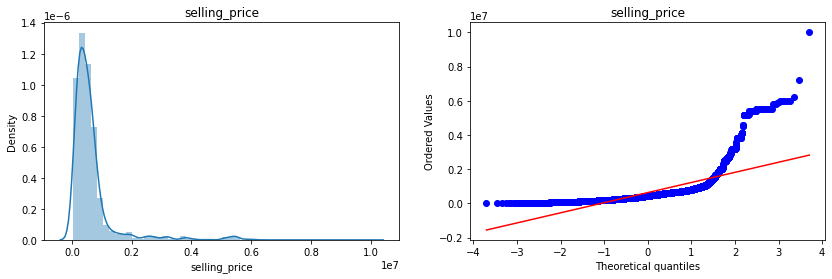

In [22]:
# Plotting the distplots without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

In [23]:
# Applying Regression without any transformation
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

1.0

In [24]:
import numpy as np
import warnings
np.warnings = warnings

In [26]:
# Applying Box-Cox Transform

from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train+ 0.00001 )
X_test_transformed = pt.transform(X_test+0.000001)
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,cols,box_cox_lambdas
0,km_driven,0.361938
1,fuel,-0.958811
2,owner,-2.390328
3,selling_price,-9.860708


In [27]:
# Applying linear regression on transformed data
lr1 = LinearRegression()
lr1.fit(X_train_transformed,y_train)
y_pred2 = lr1.predict(X_test_transformed)
r2_score(y_test,y_pred2)

0.2126000423903467

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


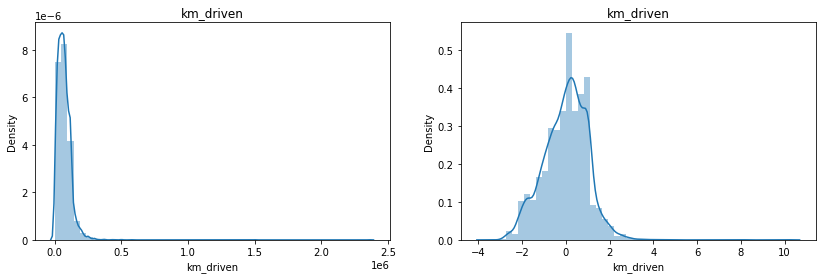

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


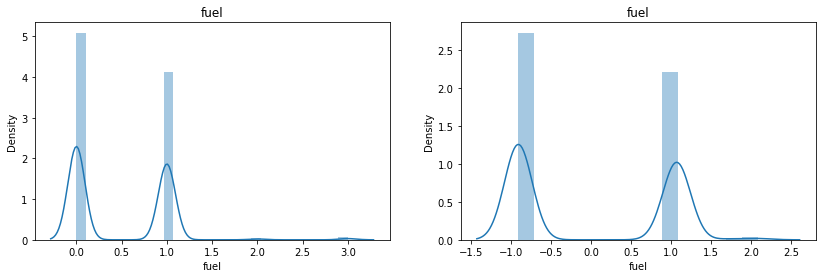

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


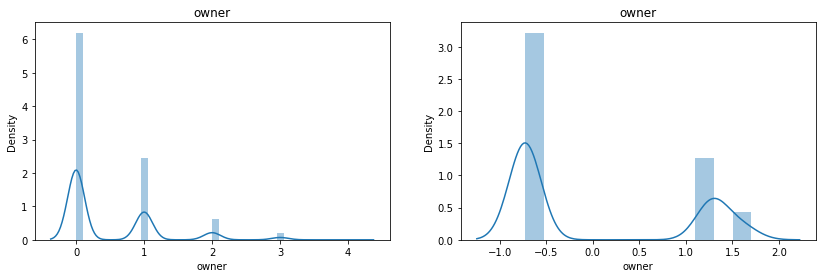

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


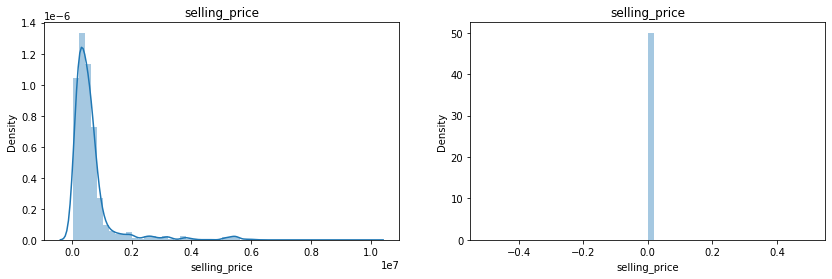

In [28]:
# Before and after comparision for Box-Cox Plot
X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(X_train[col])
    plt.title(col)

    plt.subplot(122)
    sns.distplot(X_train_transformed[col])
    plt.title(col)

    plt.show()

# Scaling

In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
df=df.iloc[:,2:]
df

,fuel,owner,selling_price
0,0.0,0.0,450000
1,0.0,1.0,370000
2,1.0,2.0,158000
3,0.0,0.0,225000
4,1.0,0.0,130000
...,...,...,...
8123,1.0,0.0,320000
8124,0.0,3.0,135000
8125,0.0,0.0,382000
8126,0.0,0.0,290000


In [32]:
df.sample(5)

,fuel,owner,selling_price
3336,1.0,0.0,600000
5085,0.0,0.0,3200000
5654,0.0,1.0,250000
7274,0.0,1.0,120000
3547,1.0,0.0,200000


In [34]:
X= df.drop('fuel', axis=1)
y= df['fuel']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)
X_train.shape, X_test.shape

((5689, 2), (2439, 2))

In [36]:
#x' = (x- mean)/std

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# transform train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
scaler.mean_

array([4.59834769e-01, 6.45591706e+05])

In [38]:
X_train

,owner,selling_price
2246,0.0,350000
2095,1.0,225000
3290,0.0,370000
6868,0.0,360000
6895,0.0,1350000
...,...,...
7935,2.0,40000
5192,0.0,580000
3980,0.0,190000
235,1.0,250000


In [39]:
X_train_scaled

array([[-0.63587392, -0.3587019 ],
       [ 0.7469574 , -0.51038998],
       [-0.63587392, -0.33443181],
       ...,
       [-0.63587392, -0.55286264],
       [ 0.7469574 , -0.48005236],
       [-0.63587392, -0.2009463 ]])

In [40]:
np.round(X_train_scaled, 1)

array([[-0.6, -0.4],
       [ 0.7, -0.5],
       [-0.6, -0.3],
       ...,
       [-0.6, -0.6],
       [ 0.7, -0.5],
       [-0.6, -0.2]])

In [41]:
X_train_scaled.dtype

dtype('float64')

In [42]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

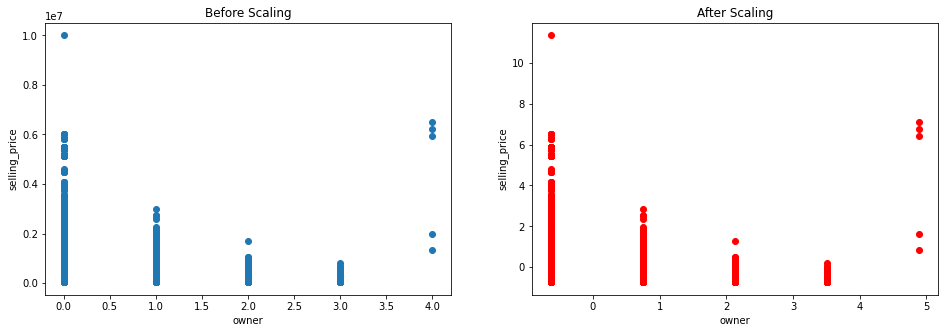

In [43]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.scatter(X_train['owner'], X_train['selling_price'])
plt.xlabel('owner')
plt.ylabel('selling_price')
plt.title('Before Scaling')

plt.subplot(1,2,2)
plt.scatter(X_train_scaled['owner'], X_train_scaled['selling_price'],color='red')
plt.xlabel('owner')
plt.ylabel('selling_price')
plt.title('After Scaling')


plt.show()

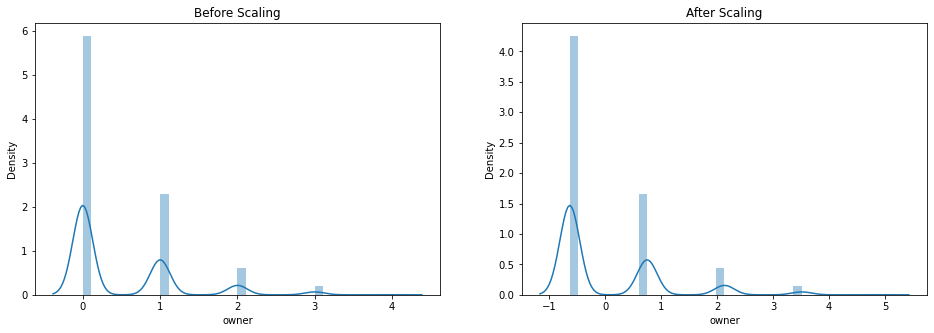

In [44]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(X_train['owner'])
plt.title('Before Scaling')

plt.subplot(1,2,2)
sns.distplot(X_train_scaled['owner'])
plt.title('After Scaling')

plt.show()

In [45]:
#without scaling
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("Accuracy on Actual data = ",accuracy_score(y_test,y_pred))

Accuracy on Actual data =  0.5403854038540385


In [46]:
#with scaling
lr_scaled = LogisticRegression()
lr_scaled.fit(X_train_scaled,y_train)
y_pred_scaled = lr_scaled.predict(X_test_scaled)
print("Accuracy on Scaled data = ",accuracy_score(y_test,y_pred_scaled))

Accuracy on Scaled data =  0.6289462894628947


# outlier

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
df.sample(5)

,fuel,owner,selling_price
3489,0.0,1.0,720000
8109,0.0,0.0,750000
6474,1.0,0.0,360000
7084,0.0,1.0,400000
934,0.0,2.0,540000


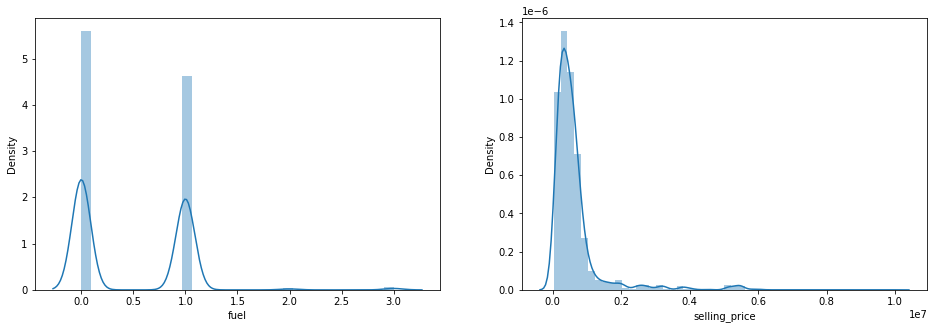

In [50]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['fuel'])

plt.subplot(1,2,2)
sns.distplot(df['selling_price'])

plt.show()

In [51]:
df['fuel'].skew()

0.8129838265508633

In [52]:
print("Mean value of fuel",df['fuel'].mean())
print("Std value of fuel",df['fuel'].std())
print("Min value of fuel",df['fuel'].min())
print("Max value of fuel",df['fuel'].max())

Mean value of fuel 0.47711614173228345
Std value of fuel 0.5485804585905661
Min value of fuel 0.0
Max value of fuel 3.0


In [53]:
# Finding the boundary values
upper_limit= df['fuel'].mean() + 3*df['fuel'].std()
lower_limit= df['fuel'].mean() - 3*df['fuel'].std()

In [54]:
# Finding outlier
outlier = df[(df['fuel'] > upper_limit) | (df['fuel'] < lower_limit)]
outlier

,fuel,owner,selling_price
35,3.0,1.0,330000
203,3.0,0.0,360000
402,3.0,0.0,409999
866,3.0,1.0,165000
1225,3.0,0.0,450000
1239,3.0,0.0,370000
1350,3.0,0.0,450000
2047,3.0,0.0,127000
2253,3.0,1.0,120000
2312,3.0,1.0,270000


In [55]:
# Removing outlier
new_df = df[(df['fuel'] < upper_limit) & (df['fuel'] > lower_limit)]
new_df.shape

(8071, 3)

<AxesSubplot:xlabel='fuel'>

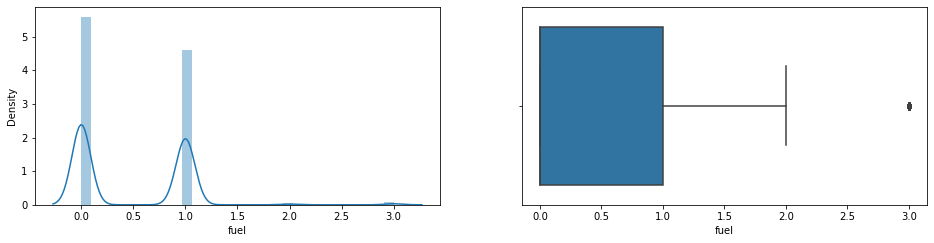

In [57]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['fuel'])

plt.subplot(2,2,2)
sns.boxplot(df['fuel'])



# Null value handling 

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
df.isnull().sum()

fuel             0
owner            0
selling_price    0
dtype: int64

In [61]:
df.describe()

,fuel,owner,selling_price
count,8128.000000,8128.000000,8.128000e+03
mean,0.477116,0.462229,6.382718e+05
std,0.548580,0.721824,8.062534e+05
min,0.000000,0.000000,2.999900e+04
25%,0.000000,0.000000,2.549990e+05
50%,0.000000,0.000000,4.500000e+05
75%,1.000000,1.000000,6.750000e+05
max,3.000000,4.000000,1.000000e+07


In [62]:
X = df.drop(columns=['selling_price'])
y = df['selling_price']
X.shape

(8128, 2)

In [63]:
#Remove the rows of empty cells
X1 =  X.dropna()
X1.shape

(8128, 2)

In [64]:
#Replace null values with constant
X2 = X['fuel'].fillna(100)

print(X['fuel'].isnull().sum())
print(X2.isnull().sum())

0
0


In [65]:
#Replace null values with mean
X3=X['fuel'].fillna(X['fuel'].mean())

print(X['fuel'].isnull().sum())
print(X3.isnull().sum())

0
0


In [66]:
##Replace null values with median
X4=X['fuel'].fillna(X['fuel'].median())

print(X['fuel'].isnull().sum())
print(X4.isnull().sum())

0
0


In [67]:
X.var() #variance

fuel     0.300941
owner    0.521029
dtype: float64

In [68]:
X3.var() #variance is reduced after mean

0.3009405195474359

In [69]:
X4.var() #variance is reduced after mean

0.3009405195474359

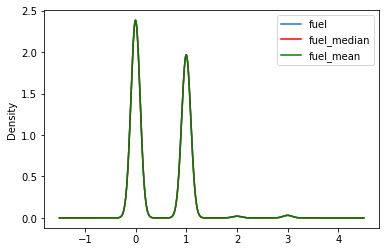

In [70]:
#PDF 
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X['fuel'].plot(kind='kde', ax=ax)

# variable imputed with the median
X4.plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X3.plot(kind='kde', ax=ax, color='green')

# add legends
labels = ['fuel','fuel_median', 'fuel_mean']
ax.legend(labels, loc='best')

# Log transformation

In [71]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [72]:
import warnings
warnings.filterwarnings("ignore")

In [73]:
df= df[['fuel', 'owner','selling_price']]
df

,fuel,owner,selling_price
0,0.0,0.0,450000
1,0.0,1.0,370000
2,1.0,2.0,158000
3,0.0,0.0,225000
4,1.0,0.0,130000
...,...,...,...
8123,1.0,0.0,320000
8124,0.0,3.0,135000
8125,0.0,0.0,382000
8126,0.0,0.0,290000


In [74]:
df['owner'].fillna(df['owner'].mean(), inplace=True)
df

,fuel,owner,selling_price
0,0.0,0.0,450000
1,0.0,1.0,370000
2,1.0,2.0,158000
3,0.0,0.0,225000
4,1.0,0.0,130000
...,...,...,...
8123,1.0,0.0,320000
8124,0.0,3.0,135000
8125,0.0,0.0,382000
8126,0.0,0.0,290000


In [75]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

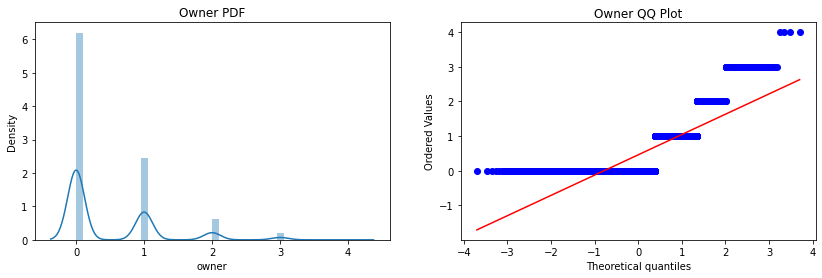

In [77]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(X_train['owner'])
plt.title('Owner PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['owner'], dist="norm", plot=plt)
plt.title('Owner QQ Plot')

plt.show()

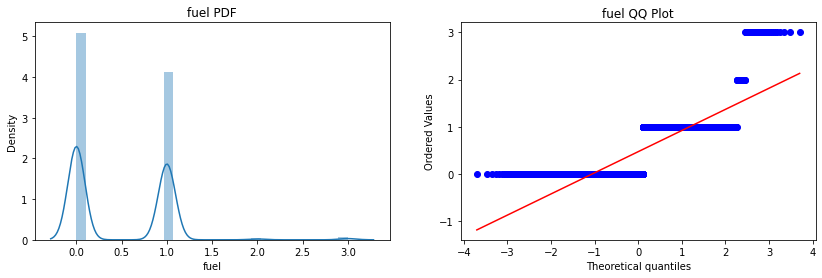

In [79]:
#Fare is not normal distributed
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.distplot(X_train['fuel'])
plt.title('fuel PDF')

plt.subplot(1,2,2)
stats.probplot(X_train['fuel'], dist="norm", plot=plt)
plt.title('fuel QQ Plot')

plt.show()

In [81]:
#without log transformation
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred= clf.predict(X_test)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.03075030750307503


In [82]:
X_train

,fuel,owner
6518,1.0,0.0
6144,1.0,1.0
6381,0.0,3.0
438,0.0,1.0
5939,1.0,0.0
...,...,...
5226,0.0,0.0
5390,0.0,1.0
860,1.0,0.0
7603,0.0,0.0


In [83]:
#Function transformation (Log Transform)
from sklearn.preprocessing import FunctionTransformer
trf = FunctionTransformer(func=np.log1p)
X_train_transformed= trf.fit_transform(X_train)
X_test_transformed= trf.transform(X_test)

In [85]:
#with log transformation
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_transformed,y_train)
y_pred= clf.predict(X_test_transformed)

print("accuracy : ", accuracy_score(y_test, y_pred))

accuracy :  0.03075030750307503


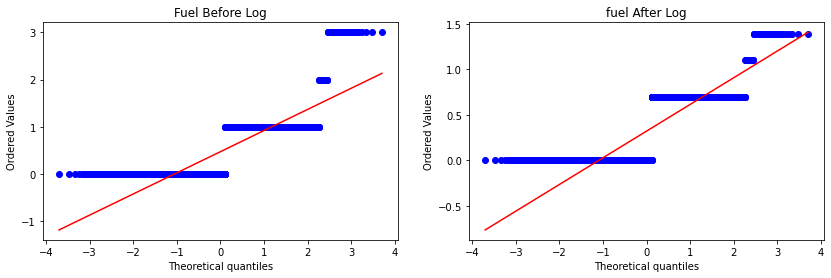

In [86]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['fuel'], dist="norm", plot=plt)
plt.title('Fuel Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['fuel'], dist="norm", plot=plt)
plt.title('fuel After Log')

plt.show()
